# Análise de evasão de clientes (Churn) de uma empresa

<img src="smileys.jpg">

### Problema

<p style="text-align: justify"> O ato de cancelamento de serviço ou saída do cliente da empresa é chamado de <i>Churn</i>, e esse é um problema que empresas precisam se preocupar diariamente para não perder lucros. A manutenção de clientes antigos pode ser um excelente alternativa para melhorar o faturamento de qualquer empresa. Isso porque, segundo artigo publicado na revista <a href="https://exame.com/pme/por-que-investir-mais-nos-clientes-atuais-do-que-em-novos/">Exame</a>, conseguir novos clientes pode custar valores muito maiores do que manter os clientes antigos na empresa. Além disso, um artigo publicado na <a href='https://hbswk.hbs.edu/archive/the-economics-of-e-loyalty'>Havard Business School </a> fala que aumentar em 5% as taxas de retenção dos clientes pode permitir lucros entre 25% a 95% para as empresas. Dessa maneira, criar estratégias que possam ajudar na retenção de clientes podem ser de grande valia para o faturamento de empresas.</p>

### Solução

<p style="text-align: justify"> Diante do problema destacado acima, será criado um modelo de machine learning que possa identificar possíveis clientes com probabilidade de evasão (<i>Churn</i>) de uma empresa. Isso pode permitir gerar estratégias direcionadas e que busquem uma maior integração entre a empresa e os clientes, podendo assim aumentar a taxa de retenção e consequentemente o lucro.</p>

### Obtenção do dataset

<p style="text-align: justify">O conjunto de dados foi conseguido no site <a href='https://www.kaggle.com/shivan118/churn-modeling-dataset'>kaggle</a> e contém dados de clientes de um banco. Abaixo segue a descrição das colunas do conjunto de dados:

**CustomerId**: Identificação do cliente;<br>
**Surname**: Sobrenome do clientes;<br>
**CreditScore**: Pontuação de credito dos clientes;<br>
**Geography**: País que o cliente pertence;<br>
**Gender**: Gênero do cliente;<br>
**Age**: Idade do cliente;<br>
**Tenure**: Quanto tempo a pessoa é cliente da empresa;<br>
**Balance**: Saldo atual na conta corrente;<br>
**NumOfProducts**: Número de produtos bancários que o cliente possui;<br>
**HasCrCard**: Se o cliente possui ou não cartão de credito (Sim = 1 e Não = 0);<br>
**IsActiveMember**: Se o cliente possui uma conta ativa, (Ativo = 1);<br>
**EstimatedSalary**: Salário anual estimado do cliente;<br>
**Exited**: Se o cliente cancelou o serviço com banco ou não (Não Churn = 0, Churn = 1,).</p>

### Importando bibliotecas

In [1]:
#Bibliotecas para tratamento dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

#Bibliotecas para pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Bibliotecas para os modelos
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

#Bibliotecas para classificação dos modelos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_precision_recall_curve
from sklearn.model_selection import cross_validate, cross_val_score, KFold

#Bibliotecas para otimização dos modelos
from sklearn.model_selection import RandomizedSearchCV

#Evitando o aparecimento de 'warnings'
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Análise exploratória dos dados

In [2]:
#Importando o conjunto de dados
df = pd.read_csv('Churn_Modelling.csv')
#Visualizando o cabeçalho do conjunto de dados
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### Verificando tamanho do banco de dados

In [3]:
#Verificando o número de linhas
print('\nNúmero de linhas:',df.shape[0],"\n")
#Verificando o número de colunas
print('Número de colunas:',df.shape[1])


Número de linhas: 10000 

Número de colunas: 14


##### Verificando o tipo dos atributos

In [4]:
#Verificando informações dos atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##### Verificando a existência de valores nulos nos atributos

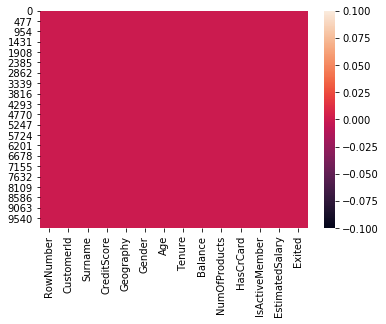

In [5]:
#Criando um gráfico para verificar dados nulos nas colunas
sns.heatmap(df.isnull());

##### Verificando a existência de valores duplicados

In [6]:
#Verificando a existência de valores duplicados
print('Valores duplicados:',df.duplicated().sum())

Valores duplicados: 0


### Analisando os clientes

In [7]:
#Verificando número de clientes que não saíram
print('Número de clientes que ficaram:',df['Exited'].value_counts()[0],'\n')
#Verificando número de clientes que saíram
print('Número de clientes que saíram:',df['Exited'].value_counts()[1],'\n')
#Verificando a porcentagem de clientes que não saíram
print('Porcentagem de clientes que ficaram:',(df['Exited'].value_counts()[0] * 100) /df.shape[0] ,'\n')
#Verificando a porcentagem de clientes que saíram
print('Porcentagem de clientes que saíram:',(df['Exited'].value_counts()[1] * 100) / df.shape[0])

Número de clientes que ficaram: 7963 

Número de clientes que saíram: 2037 

Porcentagem de clientes que ficaram: 79.63 

Porcentagem de clientes que saíram: 20.37


<p style="text-align: justify"><b>Como pode ser visto nos valores acima, a taxa de retenção de clientes no banco foi 79.63%.</b></p>

##### Verificando estatísticas descritivas do atributos 

In [8]:
#Verificando estatísticas descritivas dos atributos contínuos
df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,100090.24
std,96.65,10.49,2.89,62397.41,0.58,57510.49
min,350.00,18.00,0.00,0.00,1.00,11.58
25%,584.00,32.00,3.00,0.00,1.00,51002.11
50%,652.00,37.00,5.00,97198.54,1.00,100193.92
75%,718.00,44.00,7.00,127644.24,2.00,149388.25
max,850.00,92.00,10.00,250898.09,4.00,199992.48


O score médio do cliente foi de **650.53**, sendo o máximo **850** e o mínimo **350**;

A idada média de clientes foi de **38 anos**, sendo a máxima **92** e a mínima **18 anos**;

O tempo médio que do cliente no banco foi de **5 anos**, sendo o máximo **10 anos**;

O valor médio do saldo foi de **76.485**, sendo o máximo  **250.898**;

O número médio de produtos do banco por cliente foi de **1,5** produtos, sendo o máximo **4** e mínimo de **1**;

O salário anual médio estimado foi de **100.090**, com máxima de  **199.992** e mínimo de **11.58**.

##### Correlação entre os atributos

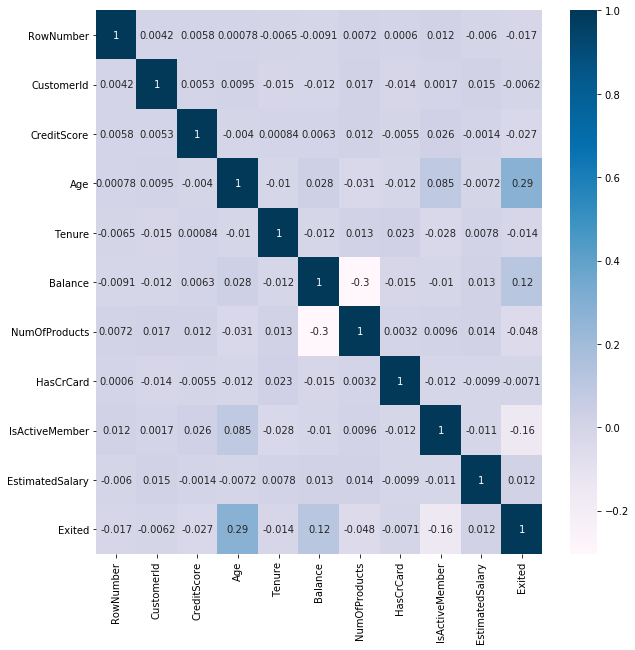

In [9]:
#Realizando correlação entre atributos
correlations = df.corr()
#Criando um gráfico de calor das correçãoes
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, annot = True, cmap='PuBu');

<p style="text-align: justify">Como pode ser verificado no mapa de calor, os atributos possuem correlações fracas entre si. </p>

##### Verificando o perfil geral dos clientes

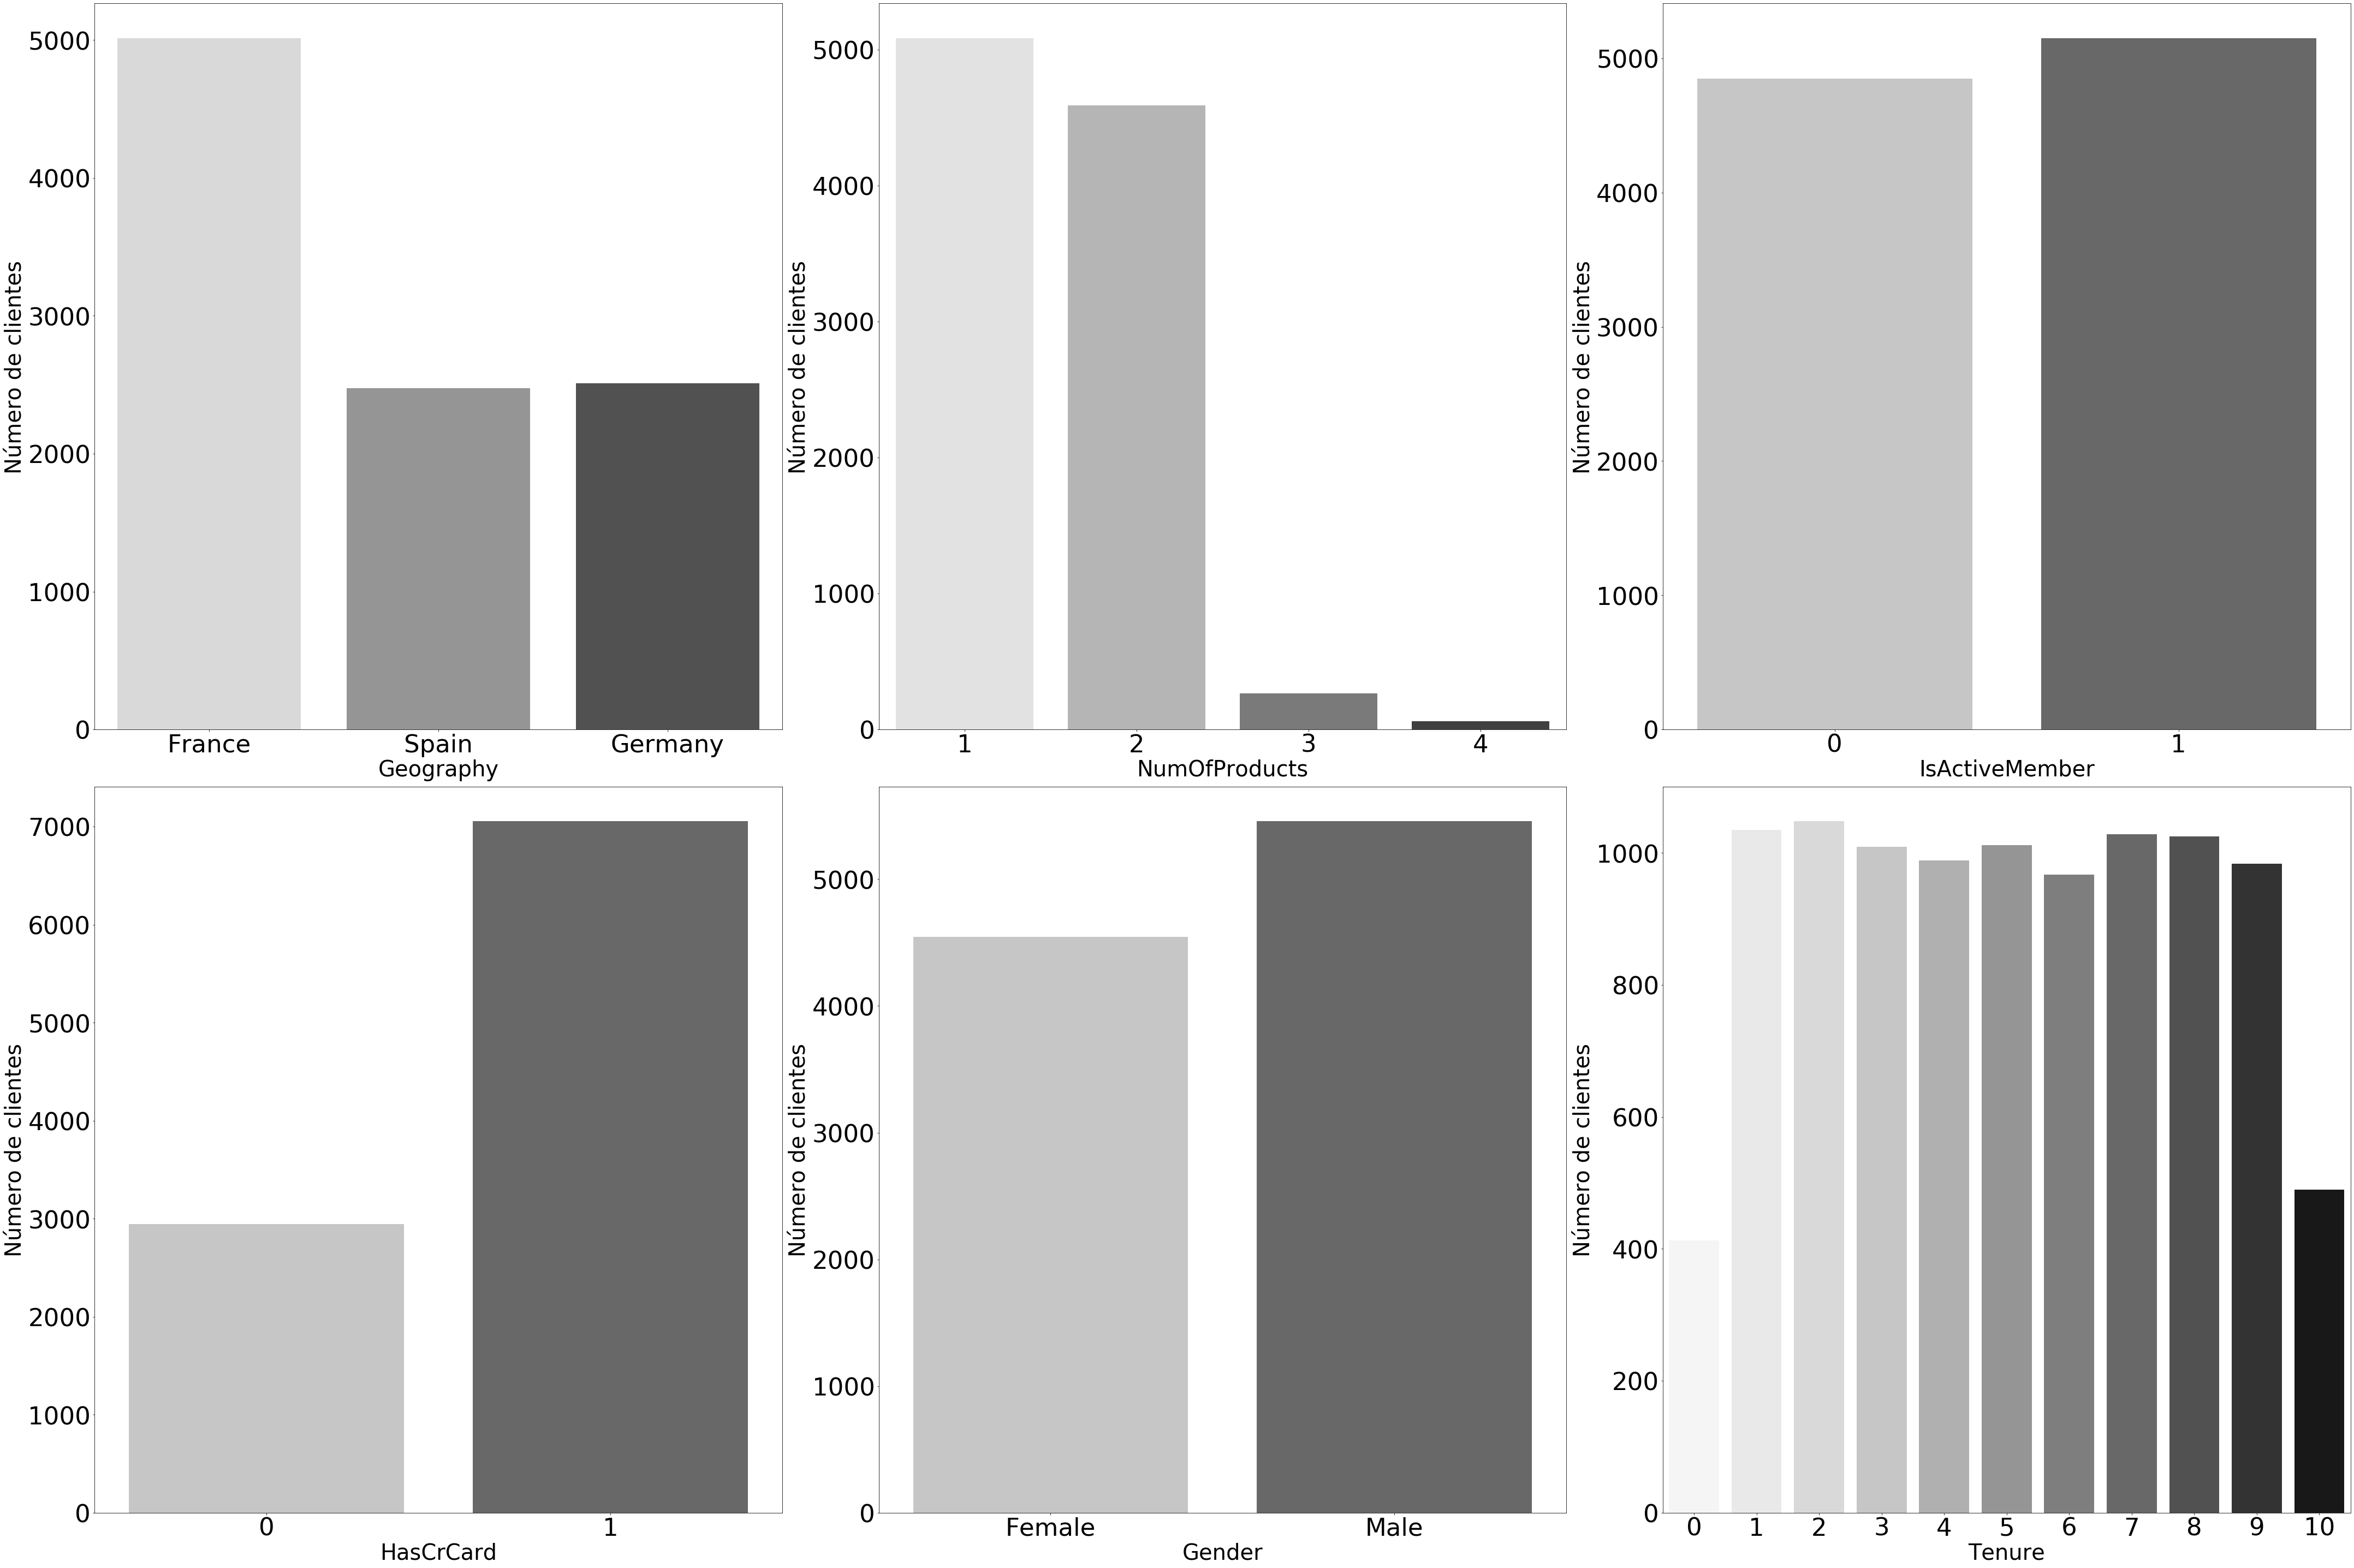

In [10]:
#Criando um gráfico de clientes entre países
plt.figure(figsize = (60,40))
plt.subplot(231)
sns.countplot(x='Geography',data=df, palette='Greys')
plt.xlabel("Geography",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45);

#Criando um gráfico de número de produtos entre clientes
plt.subplot(232)
sns.countplot(x='NumOfProducts',data=df, palette='Greys')
plt.xlabel("NumOfProducts",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45);

#Criando um gráfico de clientes que são ou não membros ativos
plt.subplot(233)
sns.countplot(x='IsActiveMember',data=df, palette='Greys')
plt.xlabel("IsActiveMember",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45);

#Criando um gráfico de clientes que possuem ou não cartão de crédito
plt.subplot(234)
sns.countplot(x='HasCrCard',data=df, palette='Greys')
plt.xlabel("HasCrCard",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45)
plt.tight_layout();

#Criando um gráfico do número de clientes por sexo
plt.subplot(235)
sns.countplot(x='Gender',data=df, palette='Greys')
plt.xlabel("Gender",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45)
plt.tight_layout();

#Criando um gráfico do tempo que os clientes estão na empresa
plt.subplot(236)
sns.countplot(x='Tenure',data=df, palette='Greys')
plt.xlabel("Tenure",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45)
plt.tight_layout();

<ol>
<li> A maioria dos clientes são da França;</li><br>

<li> Grande parte dos clientes possuem 1 ou 2 produtos da empresa;</li><br>

<li> A maior parte dos clientes são de membros ativos;</li><br>

<li> A maior parte dos clientes possui cartão de crédito;</li><br>

<li> A maioria dos clientes são do gênero masculino;</li><br>

<li> Grande parte dos clientes tinham 1 e 9 anos na empresa.
</ol>

### Separando os clientes que saíram e ficaram

In [11]:
#dataset de pessoas que deixaram o banco
df_left = df[df['Exited'] == 1]
#dataset de pessoas que ficaram no banco
df_stay = df[df['Exited'] == 0]

##### Perfil dos clientes que saíram

In [12]:
#Visualizando o conjunto de dados de clientes que saíram
df_left

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


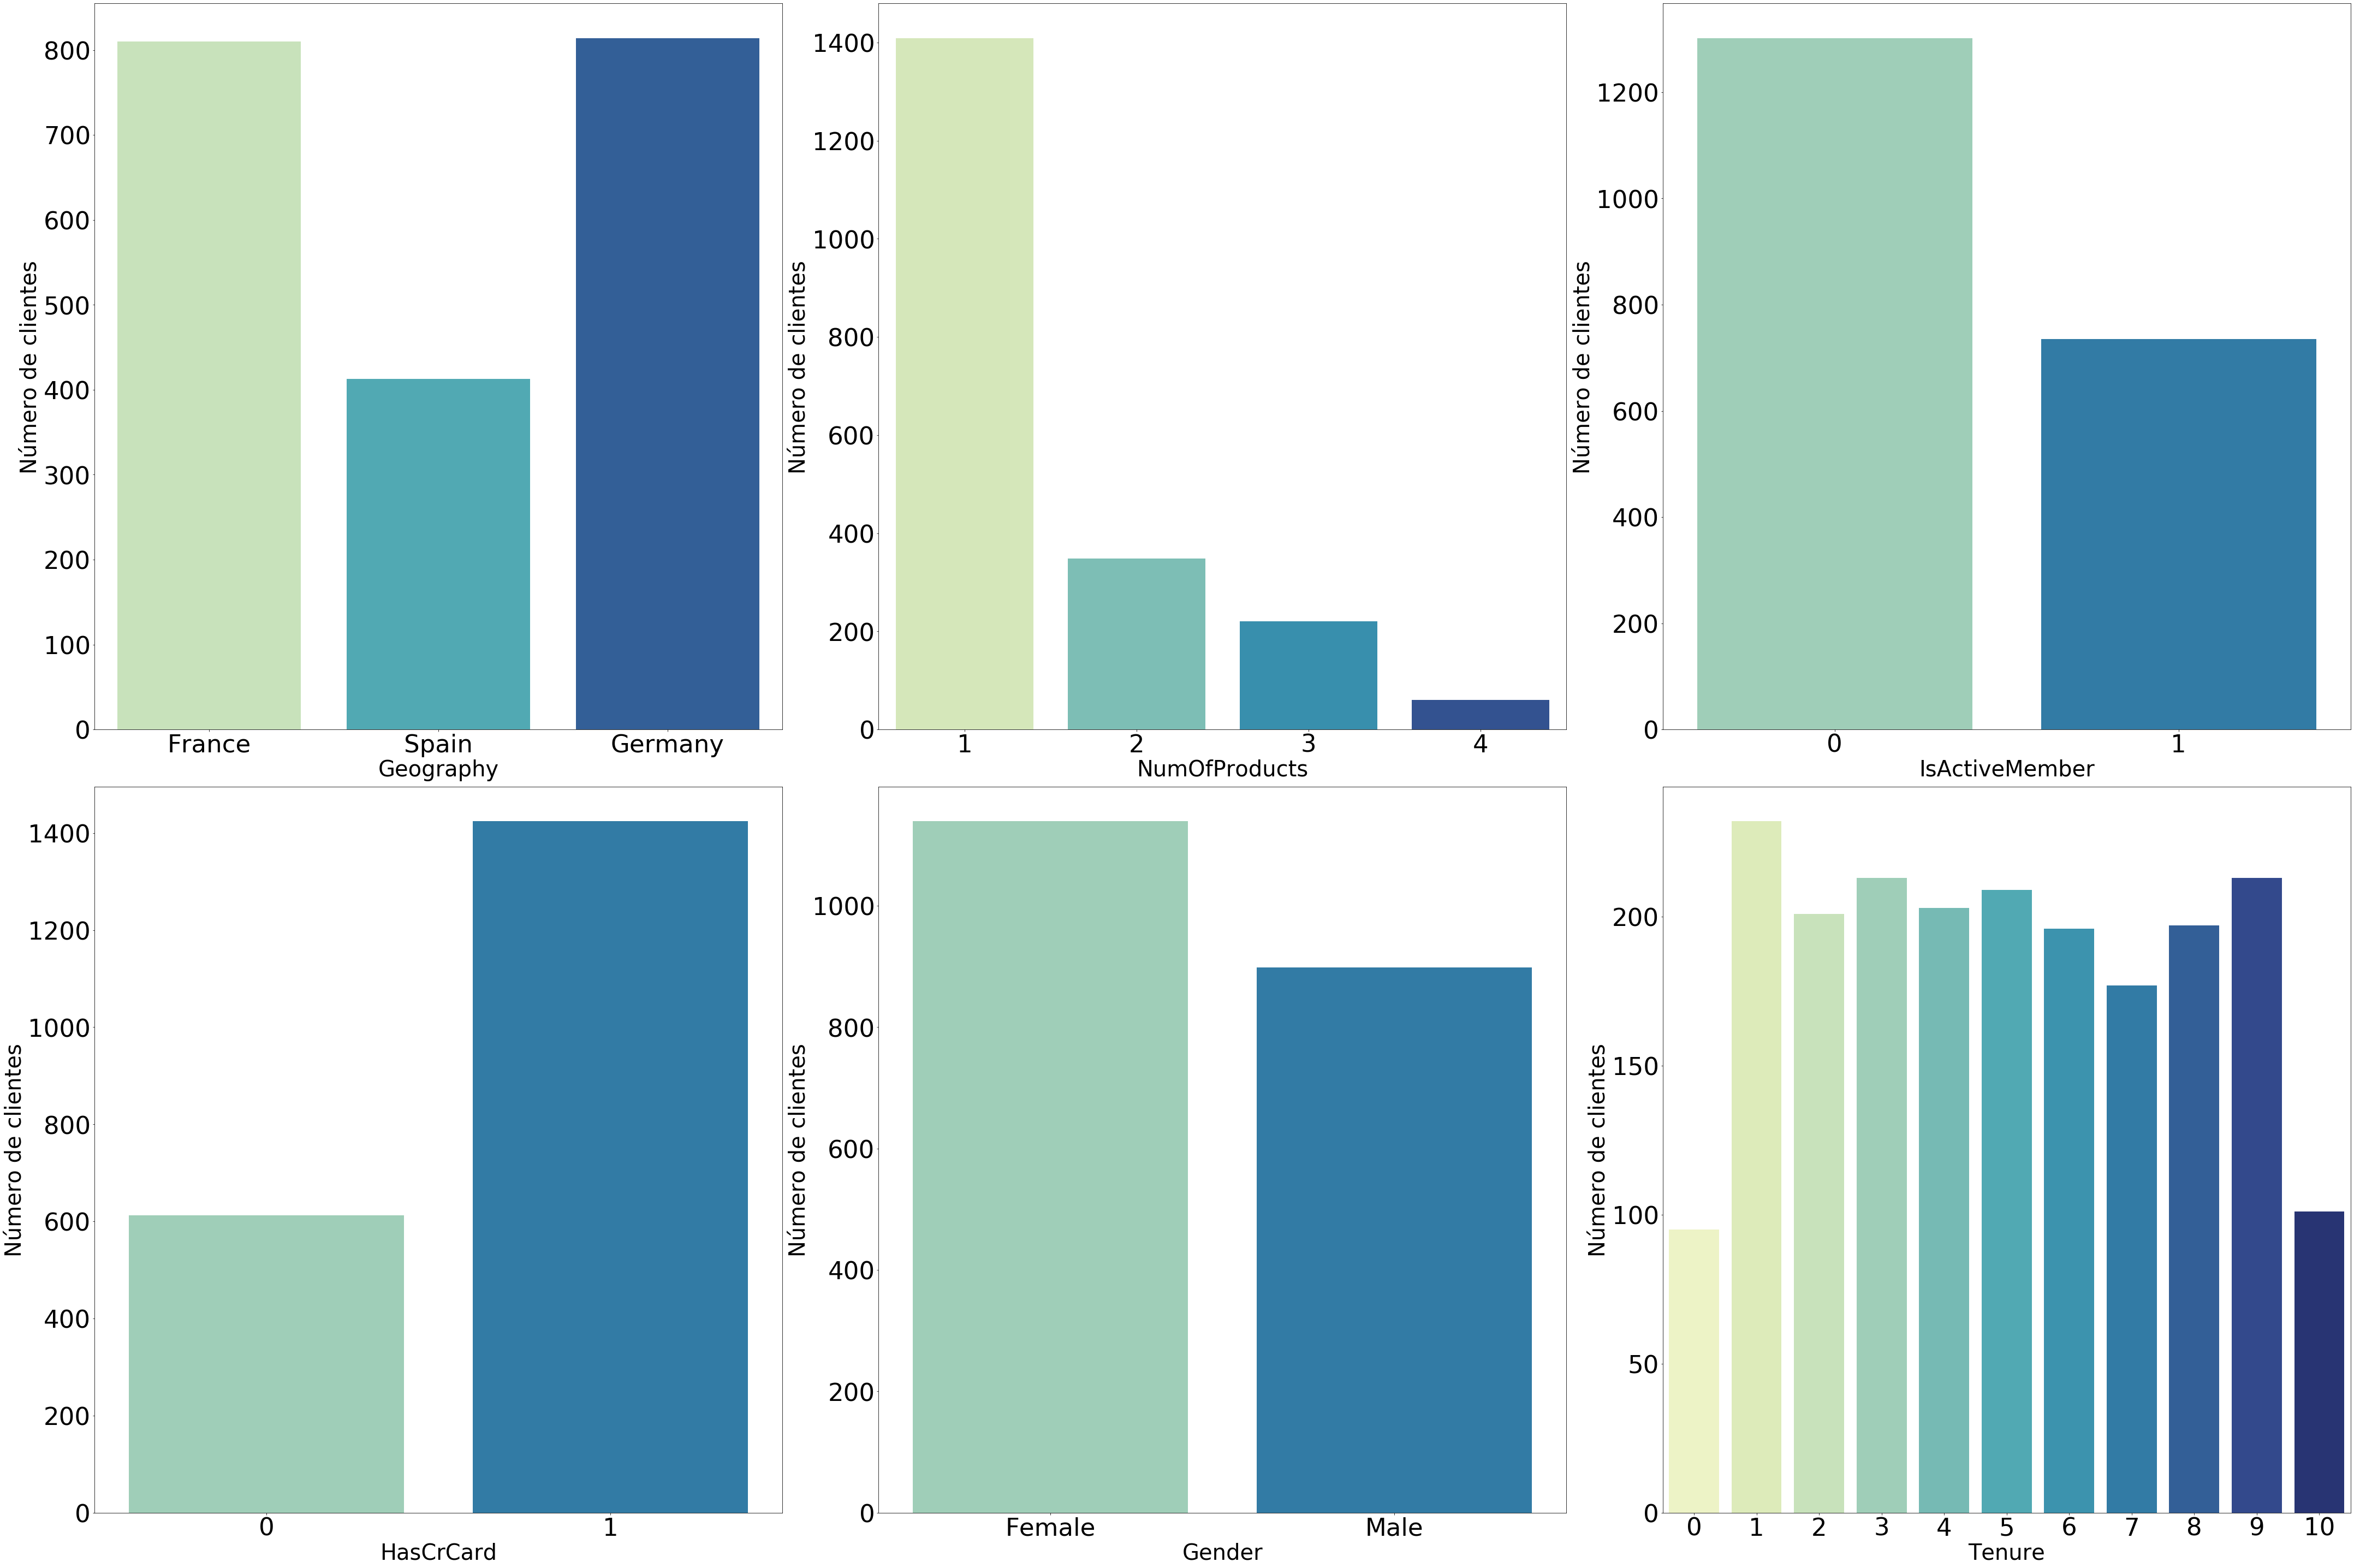

In [13]:
#Criando um gráfico de clientes entre países
plt.figure(figsize = (60,40))
plt.subplot(231)
sns.countplot(x='Geography',data=df_left,palette='YlGnBu')
plt.xlabel("Geography",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45);

#Criando um gráfico de número de produtos entre clientes
plt.subplot(232)
sns.countplot(x='NumOfProducts',data=df_left,palette='YlGnBu')
plt.xlabel("NumOfProducts",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45);

#Criando um gráfico de clientes que são ou não membros ativos
plt.subplot(233)
sns.countplot(x='IsActiveMember',data=df_left,palette='YlGnBu')
plt.xlabel("IsActiveMember",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45);

#Criando um gráfico de clientes que possuem ou não cartão de crédito
plt.subplot(234)
sns.countplot(x='HasCrCard',data=df_left,palette='YlGnBu')
plt.xlabel("HasCrCard",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45)
plt.tight_layout();

#Criando um gráfico do número de clientes por sexo
plt.subplot(235)
sns.countplot(x='Gender',data=df_left,palette='YlGnBu')
plt.xlabel("Gender",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45)
plt.tight_layout();

#Criando um gráfico do tempo que os clientes estão na empresa
plt.subplot(236)
sns.countplot(x='Tenure',data=df_left,palette='YlGnBu')
plt.xlabel("Tenure",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45);

<ol>
<li> A maioria pertence a França e Alemanha;</li><br>

<li> Grande parte possuíam somente 1 produto da empresa;</li><br>

<li> Um maior número eram de membros não ativos;</li><br>

<li> A maior parte dos cliente possuía cartão de crédito;</li><br>

<li> A maioria que saiu era do gênero feminino;</li><br>

<li> Grande parte dos clientes tinham 1 e 9 anos na empresa.   
</ol>

### Perfil dos clientes que ficaram

In [14]:
#Visualizando o conjunto de dados de clientes que permaneceram
df_stay

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


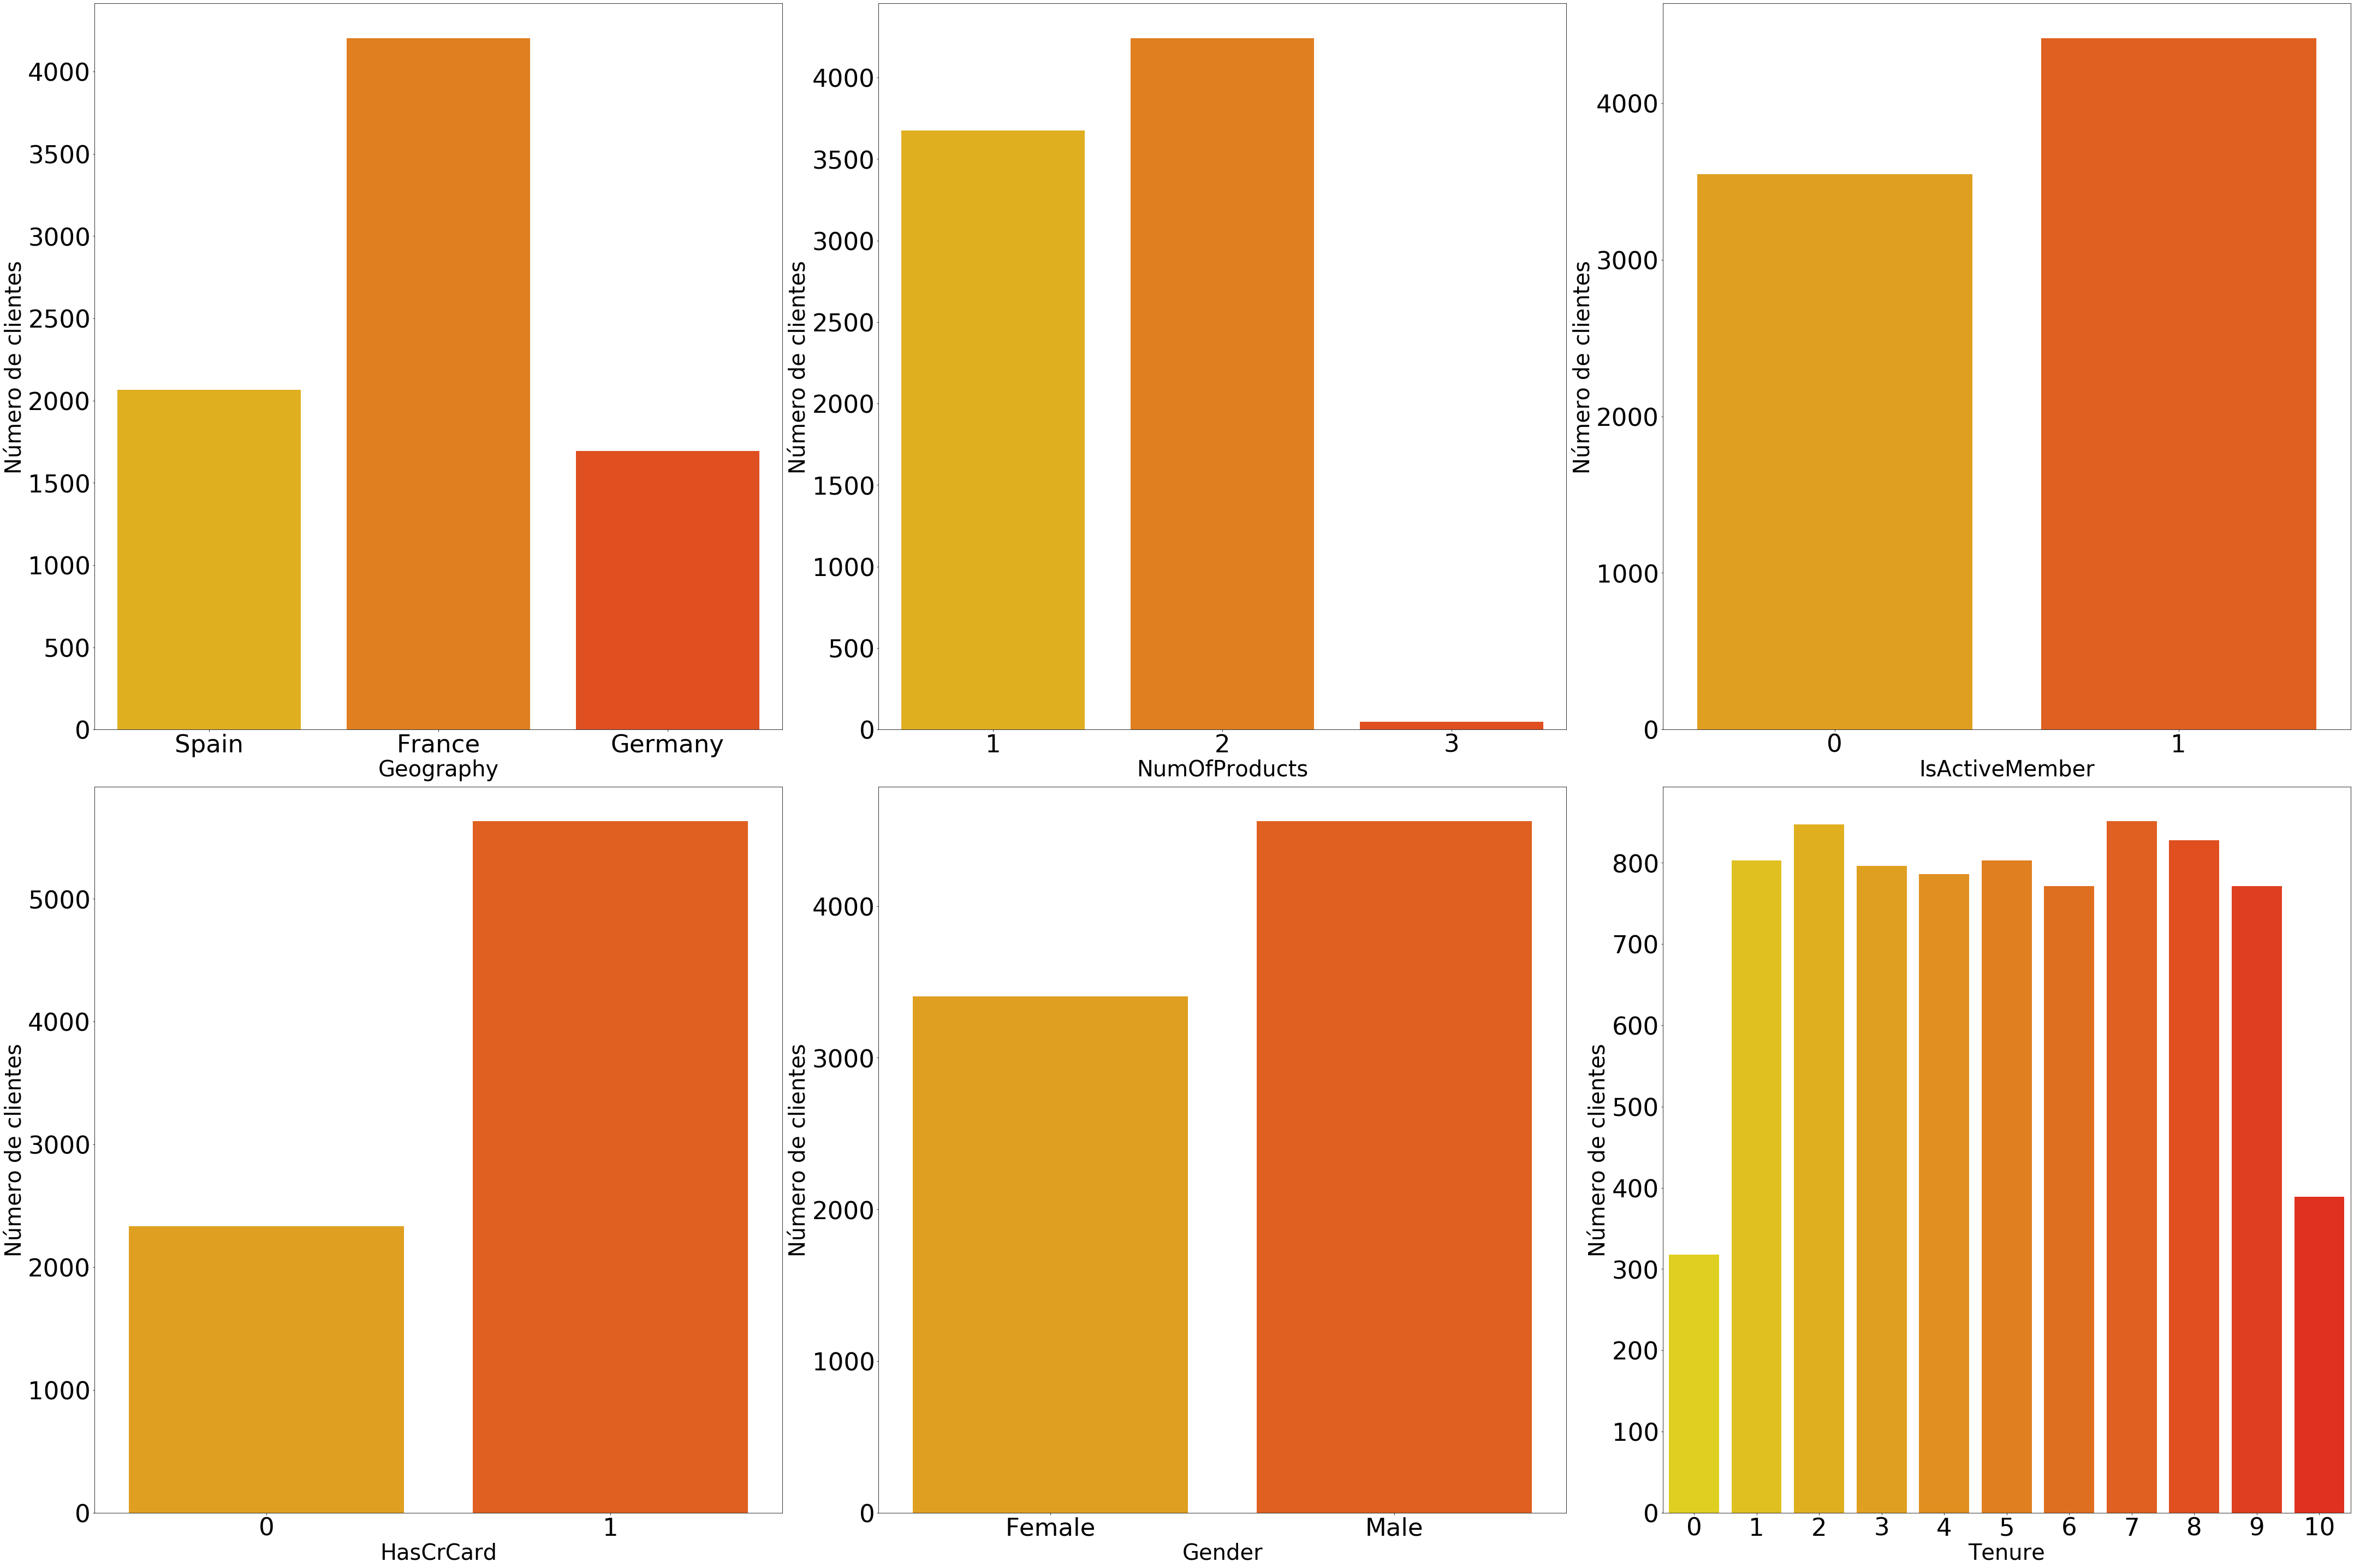

In [15]:
#Criando um gráfico de clientes entre países
plt.figure(figsize = (60,40))
plt.subplot(231)
sns.countplot(x='Geography',data=df_stay,palette='autumn_r')
plt.xlabel("Geography",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45);

#Criando um gráfico de número de produtos entre clientes
plt.subplot(232)
sns.countplot(x='NumOfProducts',data=df_stay,palette='autumn_r')
plt.xlabel("NumOfProducts",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45);

#Criando um gráfico de clientes que são ou não membros ativos
plt.subplot(233)
sns.countplot(x='IsActiveMember',data=df_stay,palette='autumn_r')
plt.xlabel("IsActiveMember",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45);

#Criando um gráfico de clientes que possuem ou não cartão de crédito
plt.subplot(234)
sns.countplot(x='HasCrCard',data=df_stay,palette='autumn_r')
plt.xlabel("HasCrCard",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45)
plt.tight_layout();

#Criando um gráfico do número de clientes por sexo
plt.subplot(235)
sns.countplot(x='Gender',data=df_stay,palette='autumn_r')
plt.xlabel("Gender",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45)
plt.tight_layout();

#Criando um gráfico do tempo que os clientes estão na empresa
plt.subplot(236)
sns.countplot(x='Tenure',data=df_stay,palette='autumn_r')
plt.xlabel("Tenure",fontsize=40)
plt.ylabel('Número de clientes',fontsize=40)
plt.tick_params(labelsize = 45);

<ol>
<li> A maioria pertence a França;</li><br>

<li> Grande parte possuem 2 produtos da empresa;</li><br>

<li> São membros ativos em sua maioria;</li><br>

<li> A maior parte dos cliente possuem cartão de crédito;</li><br>

<li> A maioria dos clientes é do gênero masculino;</li><br>

<li> Grande parte são clientes entre 1 e 9 anos da empresa.
</ol>

### Pré-processamento das variáveis

<p style="text-align: justify">Retirando atributos que não serão necessários no modelo.</p>

In [16]:
#Retirando atributos que não serão utilizados
df2 = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
#Verificando o cabeçalho do novo conjunto de dados
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### One hot encoding 

<p style="text-align: justify">Como o modelo não aceita categorias, os atributos categóricos serão transformados em formato númerico. Além disso, como são atributos categóricos nominais, também serão criadas novos atributos com cada uma das classes pertencentes aos atributos.<p> 

In [17]:
#Separando os atributos em uma lista
categorical = ['Geography','Gender','HasCrCard','IsActiveMember']
#Aplicando o one hot encoding
df2 = pd.get_dummies(df2, columns=categorical)
#Verificando o conjunto de dados
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


### Normalização

<p style="text-align: justify">Como alguns atributos possuem grandezas distintas e isso pode influenciar no funcionamento dos algoritmos de machine learning, será realizada a normalização para esses atributos.</p>

In [18]:
conti = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
scale = MinMaxScaler()
df2[conti] = scale.fit_transform(df2[conti])
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,0.2,0.000000,1,0.506735,1,1,0,0,1,0,0,1,0,1
1,0.516,0.310811,0.1,0.334031,1,0.562709,0,0,0,1,1,0,1,0,0,1
2,0.304,0.324324,0.8,0.636357,3,0.569654,1,1,0,0,1,0,0,1,1,0
3,0.698,0.283784,0.1,0.000000,2,0.469120,0,1,0,0,1,0,1,0,1,0
4,1.000,0.337838,0.2,0.500246,1,0.395400,0,0,0,1,1,0,0,1,0,1


#### Separando dados para avaliação do modelo

0    7963
1    2037
Name: Exited, dtype: int64


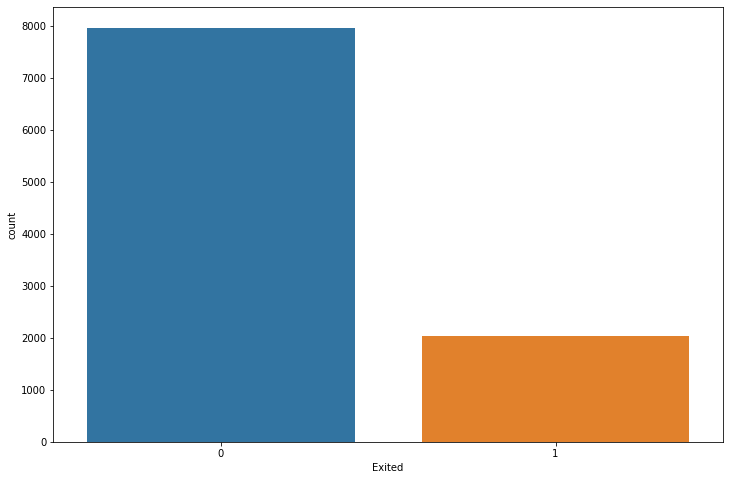

In [19]:
#Separando os atributos independentes
x = df2.drop('Exited', axis=1)
#Separando o atributo dependentes
y = df2['Exited']

#Verificando o balanceamento entre as classes
plt.figure(figsize=(12,8))
print(y.value_counts())
sns.countplot(y);

<p style="text-align: justify">Como pode ser verificado, o atributo alvo (*'Exited'*) está desbalanceado.</p>

### Random Under Sample

<p style="text-align: justify">Como nosso atributo alvo(<i>'Exited'</i>) é desbalanceado, será feito um <i>Undersampling</i>, no qual são retiradas algumas instâncias aleatoriamente da classe majoritária (classe '0' em <i>'Exited'</i>), a fim de balancear as duas classes.</p>

In [20]:
#Instanciando a função
us = RandomUnderSampler(sampling_strategy="majority", random_state=42)
#Aplicando o undersampling no conjunto de dados 
x_us,y_us = us.fit_sample(x,y)

0    2037
1    2037
Name: Exited, dtype: int64


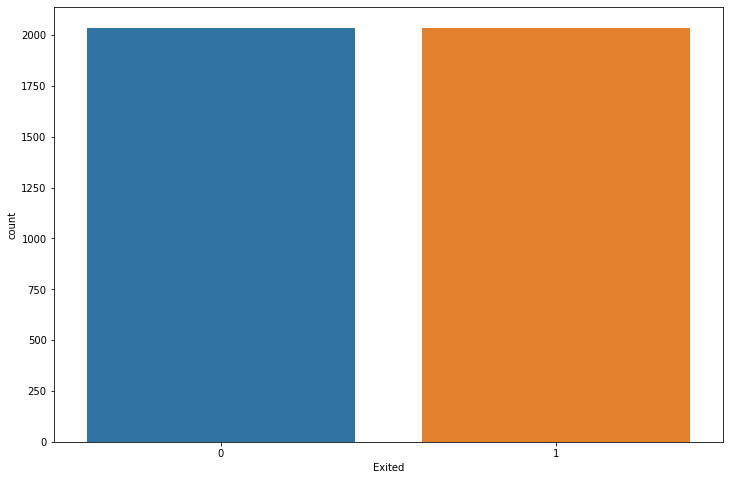

In [21]:
#Verificando o balanceamento entre as classes
plt.figure(figsize=(12,8))
print(pd.Series(y_us.value_counts()))
sns.countplot(y_us);

##### Separando os dados balanceados de treino e teste

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_us,y_us, test_size= 0.3, random_state = 42)

In [23]:
print(x_train.shape)
print(y_train.shape)

(2851, 15)
(2851,)


### Treinando os modelos

<p style="text-align: justify"> Para realizar a detecção das classes (<i>Churn</i> e <i>No Churn</i>) foram escolhidos 4 modelos, Regressão Logística, Random Forest, KNN e XGBoost, além de um modelo baseline. Todos esses modelos são amplamente usados para tarefas de classificação. Foi utilizada a validação cruzada (<i>Cross validation</i>) no treinamento dos modelos, a fim de ter uma estimativa de desempenho e precisão de cada um dos modelos e posteriormente foi realizada a validação com os dados de teste.</p>  

### Modelo Baseline

In [24]:
#Instanciando o modelo
dummy=DummyClassifier()

#Criando uma lista das métricas que serão avaliadas na validação cruzada
metrics = ['accuracy','recall','precision','f1_macro','roc_auc']

#Instanciando a validação cruzada
cv = KFold(n_splits = 10, shuffle=True)

#Aplicando a validação cruzada nos dados de treinamento
base_vc = cross_validate(dummy, x_train, y_train, cv=cv, scoring=metrics, n_jobs=-1)

#Coletando os dados de média e desvio padrão da acurácia do modelo
mean_ac = base_vc['test_accuracy'].mean()
std_ac = base_vc['test_accuracy'].std()

#Coletando os dados de média e desvio padrão da sensibilidade do modelo
mean_rec = base_vc['test_recall'].mean()
std_rec = base_vc['test_recall'].std()

#Coletando os dados de média e desvio padrão da precisão do modelo
mean_pre = base_vc['test_precision'].mean()
std_pre = base_vc['test_precision'].std()

#Coletando os dados de média e desvio padrão do F1-Score do modelo
mean_f1 = base_vc['test_f1_macro'].mean()
std_f1 = base_vc['test_f1_macro'].std()

#Coletando os dados de média e desvio padrão da curva ROC do modelo
mean_auc = base_vc['test_roc_auc'].mean()
std_auc = base_vc['test_roc_auc'].std()


#Criando um array com os valores coletados
val = np.array([['Acurácia',mean_ac.round(4), std_ac.round(4)],
                   ['Recall',mean_rec.round(4), std_rec.round(4)],
                   ['Precisão',mean_pre.round(4), std_pre.round(4)],
                   ['F1-Score',mean_f1.round(4), std_f1.round(4)],
                   ['ROC-AUC',mean_auc.round(4), std_auc.round(4)]])

#Criando um data frame com as métricas do modelo
tabela = pd.DataFrame(val, columns=['Métricas-Baseline','Média','Desvio padrão'])

#Exibindo a tabela das métricas
tabela

,Métricas-Baseline,Média,Desvio padrão
0,Acurácia,0.4977,0.0263
1,Recall,0.5034,0.0257
2,Precisão,0.5077,0.0315
3,F1-Score,0.4973,0.0265
4,ROC-AUC,0.5033,0.031


##### Validação com os dados de teste

Acurácia: 0.50 

              precision    recall  f1-score   support

           0       0.52      0.48      0.50       640
           1       0.47      0.51      0.49       583

    accuracy                           0.50      1223
   macro avg       0.50      0.50      0.50      1223
weighted avg       0.50      0.50      0.50      1223

ROC-AUC: 0.50


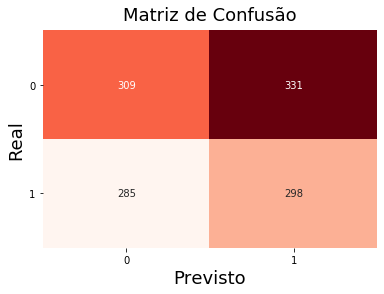

In [25]:
#Treinando o modelo
dummy.fit(x_train, y_train)

#Validando o modelo com os dados de teste
prev=dummy.predict(x_test)

#Verificando a acurácia do modelo
print("Acurácia: {0:.2f}".format(accuracy_score(y_test,prev)),'\n')

#Verificando relatório de classificação do modelo
print(classification_report(y_test,prev))

#Verificando ROC-AUC do modelo
print("ROC-AUC: {0:.2f}".format(roc_auc_score(y_test,prev)))

#Plotando a matrix de confusão do modelo
cm=confusion_matrix(y_test,prev)
ax = sns.heatmap(cm,annot=True,cbar=False,fmt ='d', cmap="Reds")
ax.set_title('Matriz de Confusão', fontsize=18,pad=10)
ax.set_xlabel('Previsto', fontsize=18)
ax.set_ylabel('Real', fontsize=18)
ax.set_xticklabels(['0','1'])
ax.set_yticklabels(['0','1'], rotation=0);

### Regressão Logistica

In [26]:
#Instanciando o modelo
logreg = LogisticRegression()

#Criando uma lista das métricas que serão avaliadas na validação cruzada
metrics = ['accuracy','recall','precision','f1_macro','roc_auc']

#Instanciando a validação cruzada
cv = KFold(n_splits = 10, shuffle=True)

#Aplicando a validação cruzada nos dados de treinamento
log_vc = cross_validate(logreg, x_train, y_train, cv=cv, scoring=metrics, n_jobs=-1)

#Coletando os dados de média e desvio padrão da acurácia do modelo
mean_ac = log_vc['test_accuracy'].mean()
std_ac = log_vc['test_accuracy'].std()

#Coletando os dados de média e desvio padrão da sensibilidade do modelo
mean_rec = log_vc['test_recall'].mean()
std_rec = log_vc['test_recall'].std()

#Coletando os dados de média e desvio padrão da precisão do modelo
mean_pre = log_vc['test_precision'].mean()
std_pre = log_vc['test_precision'].std()

#Coletando os dados de média e desvio padrão do F1-Score do modelo
mean_f1 = log_vc['test_f1_macro'].mean()
std_f1 = log_vc['test_f1_macro'].std()

#Coletando os dados de média e desvio padrão da curva ROC do modelo
mean_auc = log_vc['test_roc_auc'].mean()
std_auc = log_vc['test_roc_auc'].std()


#Criando um array com os valores coletados
val = np.array([['Acurácia',mean_ac.round(4), std_ac.round(4)],
                   ['Recall',mean_rec.round(4), std_rec.round(4)],
                   ['Precisão',mean_pre.round(4), std_pre.round(4)],
                   ['F1-Score',mean_f1.round(4), std_f1.round(4)],
                   ['ROC-AUC',mean_auc.round(4), std_auc.round(4)]])

#Criando um data frame com as métricas do modelo
tabela = pd.DataFrame(val, columns=['Métricas-Regressão Logística','Média','Desvio padrão'])

#Exibindo a tabela das métricas
tabela

,Métricas-Regressão Logística,Média,Desvio padrão
0,Acurácia,0.6973,0.0326
1,Recall,0.7006,0.0399
2,Precisão,0.7051,0.043
3,F1-Score,0.6967,0.0326
4,ROC-AUC,0.7634,0.0328


Acurácia: 0.72 

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       640
           1       0.70      0.72      0.71       583

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223

ROC-AUC: 0.72


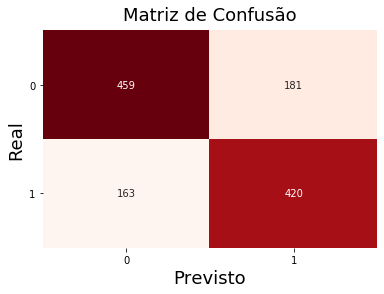

In [27]:
#Treinando o modelo
logreg.fit(x_train,y_train)

#Validando o modelo com os dados de teste
logreg_prediction = logreg.predict(x_test)

#Verificando a acurácia do modelo
print("Acurácia: {0:.2f}".format(accuracy_score(y_test,logreg_prediction)),'\n')

#Verificando relatório de classificação do modelo
print(classification_report(y_test,logreg_prediction))

#Verificando ROC-AUC do modelo
print("ROC-AUC: {0:.2f}".format(roc_auc_score(y_test,logreg_prediction)))

#Plotando a matrix de confusão do modelo
cm=confusion_matrix(y_test,logreg_prediction)
ax = sns.heatmap(cm,annot=True,cbar=False,fmt ='d', cmap="Reds")
ax.set_title('Matriz de Confusão', fontsize=18,pad=10)
ax.set_xlabel('Previsto', fontsize=18)
ax.set_ylabel('Real', fontsize=18)
ax.set_xticklabels(['0','1'])
ax.set_yticklabels(['0','1'], rotation=0);

### Random Forest

### Validação cruzada

In [53]:
#Instanciando o modelo
rf = RandomForestClassifier()

#Criando uma lista das métricas que serão avaliadas na validação cruzada
metrics = ['accuracy','recall','precision','f1_macro','roc_auc']

#Instanciando a validação cruzada
cv = KFold(n_splits = 10, shuffle=True)

#Aplicando a validação cruzada nos dados de treinamento
rf_vc = cross_validate(rf, x_train, y_train, cv=cv, scoring=metrics, n_jobs=-1)

#Coletandos os dados de média e desvio padrão da acurácia do modelo
mean_ac = rf_vc['test_accuracy'].mean()
std_ac = rf_vc['test_accuracy'].std()

#Coletando os dados de média e desvio padrão da sensibilidade do modelo
mean_rec = rf_vc['test_recall'].mean()
std_rec = rf_vc['test_recall'].std()

#Coletando os dados de média e desvio padrão da precisão do modelo
mean_pre = rf_vc['test_precision'].mean()
std_pre = rf_vc['test_precision'].std()

#Coletando os dados de média e desvio padrão do F1-Score do modelo
mean_f1 = rf_vc['test_f1_macro'].mean()
std_f1 = rf_vc['test_f1_macro'].std()

#Coletando os dados de média e desvio padrão da curva ROC do modelo
mean_auc = rf_vc['test_roc_auc'].mean()
std_auc = rf_vc['test_roc_auc'].std()

#Criando um array com os valores coletados
val = np.array([['Acurácia',mean_ac.round(4), std_ac.round(4)],
                   ['Recall',mean_rec.round(4), std_rec.round(4)],
                   ['Precisão',mean_pre.round(4), std_pre.round(4)],
                   ['F1-Score',mean_f1.round(4), std_f1.round(4)],
                   ['ROC-AUC',mean_auc.round(4), std_auc.round(4)]])

#Criando um data frame com as métricas do modelo
tabela = pd.DataFrame(val, columns=['Métricas-Random Forest','Média','Desvio padrão'])
#Exibindo a tabela das métricas
tabela

,Métricas-Random Forest,Média,Desvio padrão
0,Acurácia,0.7643,0.0278
1,Recall,0.7555,0.0442
2,Precisão,0.776,0.0242
3,F1-Score,0.7636,0.0277
4,ROC-AUC,0.8495,0.0212


Acurácia: 0.76 

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       640
           1       0.76      0.73      0.75       583

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223

ROC-AUC: 0.76


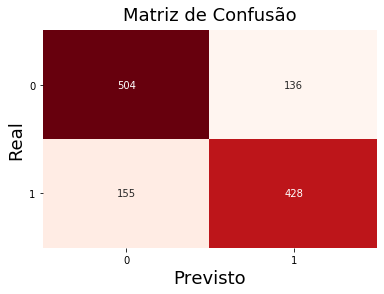

In [54]:
#Treinando o modelo
rf.fit(x_train,y_train)

#Validando o modelo com os dados de teste
rf_prediction = rf.predict(x_test)

#Verificando a acurácia do modelo
print("Acurácia: {0:.2f}".format(accuracy_score(y_test,rf_prediction)),"\n")

#Verificando relatório de classificação do modelo
print(classification_report(y_test,rf_prediction))

#Verificando ROC-AUC do modelo
print("ROC-AUC: {0:.2f}".format(roc_auc_score(y_test,rf_prediction)))

#Plotando a matrix de confusão do modelo
cm = confusion_matrix(y_test,rf_prediction)
ax = sns.heatmap(cm,annot=True,cbar=False,fmt ='d', cmap="Reds")
ax.set_title('Matriz de Confusão', fontsize=18,pad=10)
ax.set_xlabel('Previsto', fontsize=18)
ax.set_ylabel('Real', fontsize=18)
ax.set_xticklabels(['0','1'])
ax.set_yticklabels(['0','1'], rotation=0);

### KNN

### Validação cruzada

In [30]:
#Instanciando o modelo
knn = KNeighborsClassifier()

#Criando uma lista das métricas que serão avaliadas na validação cruzada
metrics = ['accuracy','recall','precision','f1_macro','roc_auc']

#Instanciando a validação cruzada
cv = KFold(n_splits = 10, shuffle=True)

#Aplicando a validação cruzada nos dados de treinamento
knn_vc = cross_validate(knn, x_train, y_train, cv=cv, scoring=metrics, n_jobs=-1)

#Coletandos os dados de média e desvio padrão da acurácia do modelo
mean_ac = knn_vc['test_accuracy'].mean()
std_ac = knn_vc['test_accuracy'].std()

#Coletando os dados de média e desvio padrão da sensibilidade do modelo
mean_rec = knn_vc['test_recall'].mean()
std_rec = knn_vc['test_recall'].std()

#Coletando os dados de média e desvio padrão da precisão do modelo
mean_pre = knn_vc['test_precision'].mean()
std_pre = knn_vc['test_precision'].std()

#Coletando os dados de média e desvio padrão do F1-Score do modelo
mean_f1 = knn_vc['test_f1_macro'].mean()
std_f1 = knn_vc['test_f1_macro'].std()

#Coletando os dados de média e desvio padrão da curva ROC do modelo
mean_auc = knn_vc['test_roc_auc'].mean()
std_auc = knn_vc['test_roc_auc'].std()

#Criando um array com os valores coletados
val = np.array([['Acurácia',mean_ac.round(4), std_ac.round(4)],
                   ['Recall',mean_rec.round(4), std_rec.round(4)],
                   ['Precisão',mean_pre.round(4), std_pre.round(4)],
                   ['F1-Score',mean_f1.round(4), std_f1.round(4)],
                   ['ROC-AUC',mean_auc.round(4), std_auc.round(4)]])

#Criando um data frame com as métricas do modelo                    
tabela = pd.DataFrame(val, columns=['Métricas-KNN','Média','Desvio padrão'])

#Exibindo a tabela das métricas
tabela

,Métricas-KNN,Média,Desvio padrão
0,Acurácia,0.7261,0.0213
1,Recall,0.7034,0.0363
2,Precisão,0.7454,0.0322
3,F1-Score,0.7251,0.0213
4,ROC-AUC,0.7881,0.0216


Accuracy: 0.72 

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       640
           1       0.71      0.68      0.70       583

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223

ROC-AUC: 0.72


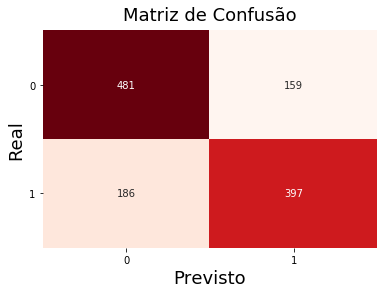

In [31]:
#Treinando o modelo
knn.fit(x_train,y_train)

#Validando o modelo com os dados de teste
knn_prediction = knn.predict(x_test)

#Verificando a acurácia do modelo
print("Accuracy: {0:.2f}".format(accuracy_score(y_test,knn_prediction)),"\n")

#Verificando relatório de classificação do modelo
print(classification_report(y_test,knn_prediction))

#Verificando ROC-AUC do modelo
print("ROC-AUC: {0:.2f}".format(roc_auc_score(y_test,knn_prediction)))

#Plotando a matrix de confusão do modelo
cm = confusion_matrix(y_test,knn_prediction)
ax = sns.heatmap(cm,annot=True,cbar=False,fmt ='d', cmap="Reds")
ax.set_title('Matriz de Confusão', fontsize=18,pad=10)
ax.set_xlabel('Previsto', fontsize=18)
ax.set_ylabel('Real', fontsize=18)
ax.set_xticklabels(['0','1'])
ax.set_yticklabels(['0','1'], rotation=0);

### XGBoost

### Validação cruzada

In [55]:
#Instanciando o modelo
xgb = XGBClassifier()

#Criando uma lista das métricas que serão avaliadas na validação cruzada
metrics = ['accuracy','recall','precision','f1_macro','roc_auc']

#Instanciando a validação cruzada
cv = KFold(n_splits = 10, shuffle=True)

#Aplicando a validação cruzada nos dados de treinamento
xgb_vc = cross_validate(xgb, x_train, y_train, cv=cv, scoring=metrics, n_jobs=-1)

#Coletandos os dados de média e desvio padrão da acurácia do modelo
mean_ac = xgb_vc['test_accuracy'].mean()
std_ac = xgb_vc['test_accuracy'].std()

#Coletando os dados de média e desvio padrão da sensibilidade do modelo
mean_rec = xgb_vc['test_recall'].mean()
std_rec = xgb_vc['test_recall'].std()

#Coletando os dados de média e desvio padrão da precisão do modelo
mean_pre = xgb_vc['test_precision'].mean()
std_pre = xgb_vc['test_precision'].std()

#Coletando os dados de média e desvio padrão do F1-Score do modelo
mean_f1 = xgb_vc['test_f1_macro'].mean()
std_f1 = xgb_vc['test_f1_macro'].std()

#Coletando os dados de média e desvio padrão da curva ROC do modelo
mean_auc = xgb_vc['test_roc_auc'].mean()
std_auc = xgb_vc['test_roc_auc'].std()

#Criando um array com os valores coletados
val = np.array([['Acurácia',mean_ac.round(4), std_ac.round(4)],
                   ['Recall',mean_rec.round(4), std_rec.round(4)],
                   ['Precisão',mean_pre.round(4), std_pre.round(4)],
                   ['F1-Score',mean_f1.round(4), std_f1.round(4)],
                   ['ROC-AUC',mean_auc.round(4), std_auc.round(4)]])

#Criando um data frame com as métricas do modelo
tabela = pd.DataFrame(val, columns=['Métricas-XGBoost','Média','Desvio padrão'])
#Exibindo a tabela das métricas
tabela

,Métricas-XGBoost,Média,Desvio padrão
0,Acurácia,0.7597,0.024
1,Recall,0.7534,0.0243
2,Precisão,0.771,0.0362
3,F1-Score,0.7594,0.024
4,ROC-AUC,0.8385,0.0186


[09:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.75 

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       640
           1       0.74      0.73      0.73       583

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223

ROC-AUC: 0.75


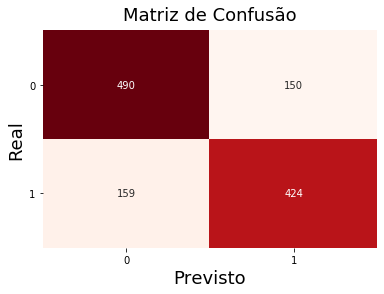

In [56]:
#Treinando o modelo
xgb.fit(x_train,y_train)

#Validando o modelo com os dados de teste
xgb_prediction = xgb.predict(x_test)

#Verificando a acurácia do modelo
print("Accuracy: {0:.2f}".format(accuracy_score(y_test,xgb_prediction)),"\n")

#Verificando relatório de classificação do modelo
print(classification_report(y_test,xgb_prediction))

#Verificando ROC-AUC do modelo
print("ROC-AUC: {0:.2f}".format(roc_auc_score(y_test,xgb_prediction)))

#Plotando a matrix de confusão do modelo
cm = confusion_matrix(y_test,xgb_prediction)
ax = sns.heatmap(cm,annot=True,cbar=False,fmt ='d', cmap="Reds")
ax.set_title('Matriz de Confusão', fontsize=18,pad=10)
ax.set_xlabel('Previsto', fontsize=18)
ax.set_ylabel('Real', fontsize=18)
ax.set_xticklabels(['0','1'])
ax.set_yticklabels(['0','1'], rotation=0);

### Avaliação dos modelos

#### Probabilidade dos modelos

In [57]:
#Coletando as probabilidades de cada um dos modelos
dum_prob = dummy.predict_proba(x_test)
logreg_prob = logreg.predict_proba(x_test)
rf_prob = rf.predict_proba(x_test)
knn_prob = knn.predict_proba(x_test)
xgb_prob = xgb.predict_proba(x_test)

##### Probabilidade de interesse

In [58]:
#Coletando as probabilidades de evasão de cada um dos modelos
probs_dum = dum_prob[:, 1]
probs_logreg = logreg_prob[:, 1]
probs_rf = rf_prob[:, 1]
probs_knn = knn_prob[:, 1]
probs_xgb = xgb_prob[:, 1]

##### Curva ROC dos modelos

In [59]:
#Coletando as taxas de verdadeiro positivo e falso positivo de cada modelo
rfpd, rvpd,limd = roc_curve(y_test, probs_dum)
rfp1, rvp1,lim1 = roc_curve(y_test, probs_xgb)
rfp2, rvp2,lim2 = roc_curve(y_test, probs_logreg)
rfp3, rvp3,lim3 = roc_curve(y_test, probs_rf)
rfp4, rvp4,lim4 = roc_curve(y_test, probs_knn)

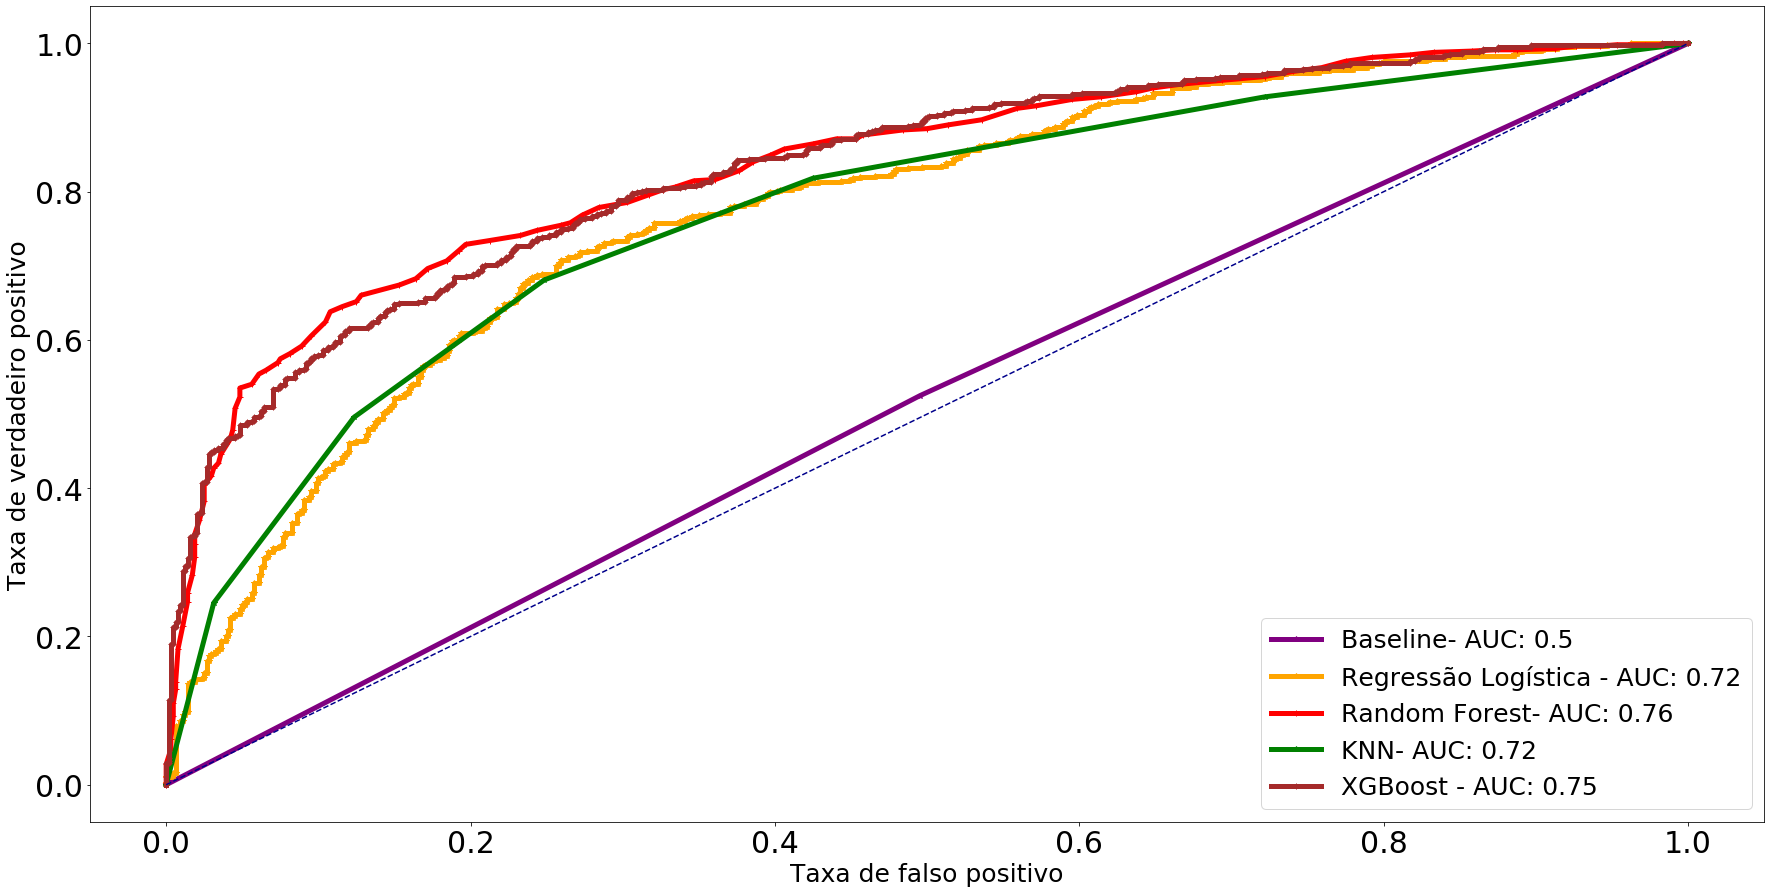

In [60]:
#Plotando a curva ROC de cada modelo

plt.figure(figsize=(30,15))

plt.plot(rfpd, rvpd, marker='*', label='Baseline- AUC: {}'.format(roc_auc_score(y_test,prev).round(2)),color="purple", linewidth=5)
plt.plot(rfp2, rvp2, marker='*', label='Regressão Logística - AUC: {}'.format(roc_auc_score(y_test,logreg_prediction).round(2)),color="orange",linewidth=5)
plt.plot(rfp3, rvp3, marker='+', label='Random Forest- AUC: {}'.format(roc_auc_score(y_test,rf_prediction).round(2)),color="red",linewidth=5)
plt.plot(rfp4, rvp4, marker='*', label='KNN- AUC: {}'.format(roc_auc_score(y_test,knn_prediction).round(2)),color="green",linewidth=5)
plt.plot(rfp1, rvp1, marker='+', label='XGBoost - AUC: {}'.format(roc_auc_score(y_test,xgb_prediction).round(2)),color="brown",linewidth=5)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('Taxa de falso positivo', fontsize=25)
plt.ylabel('Taxa de verdadeiro positivo',fontsize=25)
plt.tick_params(labelsize=30)

plt.legend(loc='lower right',fontsize=25)

plt.show()

##### Comparação das métricas modelos

In [61]:
#Criando um array com as métricas do modelo
modelos= np.array([['Random Forest', accuracy_score(y_test,rf_prediction).round(4), recall_score(y_test,rf_prediction).round(4),
                     precision_score(y_test,rf_prediction).round(4),f1_score(y_test,rf_prediction).round(4),roc_auc_score(y_test,rf_prediction).round(4)],
                   ['XGBoost',accuracy_score(y_test,xgb_prediction).round(4), recall_score(y_test,xgb_prediction).round(4),
                     precision_score(y_test,xgb_prediction).round(4),f1_score(y_test,xgb_prediction).round(4),roc_auc_score(y_test,xgb_prediction).round(4)],
                   ['KNN',accuracy_score(y_test,knn_prediction).round(4), recall_score(y_test,knn_prediction).round(4),
                     precision_score(y_test,knn_prediction).round(4),f1_score(y_test,knn_prediction).round(4),roc_auc_score(y_test,knn_prediction).round(4)],
                   ['Regressão Logística',accuracy_score(y_test,logreg_prediction).round(4), recall_score(y_test,logreg_prediction).round(4),
                     precision_score(y_test,logreg_prediction).round(2),f1_score(y_test,logreg_prediction).round(4),roc_auc_score(y_test,logreg_prediction).round(2)],
                   ['Baseline',accuracy_score(y_test,prev).round(4), recall_score(y_test,prev).round(4),
                     precision_score(y_test,prev).round(4),f1_score(y_test,prev).round(4),roc_auc_score(y_test,prev).round(4)]])

#Criando um dataframe da métricas de cada modelo avaliado
tabela = pd.DataFrame(modelos, columns = ["Modelo",'Acurácia',"Recall","Precisão",'F1-Score',"ROC AUC"])
#Ordenando os valores da tabela pela acurácia
tabela.sort_values(by='Acurácia',inplace=True, ascending=False)
#Exibindo a tabela
tabela

,Modelo,Acurácia,Recall,Precisão,F1-Score,ROC AUC
0,Random Forest,0.7621,0.7341,0.7589,0.7463,0.7608
1,XGBoost,0.7473,0.7273,0.7387,0.7329,0.7464
3,Regressão Logística,0.7187,0.7204,0.7,0.7095,0.72
2,KNN,0.7179,0.681,0.714,0.6971,0.7163
4,Baseline,0.4963,0.5111,0.4738,0.4917,0.497


<p style="text-align: justify">A partir da avaliação das métricas dos modelos (Acurácia, Recall, Precisão, F1-Score e a Curva Roc), dois modelos se sobressaíram em relação aos outros, o XGBoost e o Random Forest. Como o Random Forests teve uma perfomance de precisão um pouco melhor, esse modelo foi escolhido.</p>

### Otimização do Random Forest

A fim de melhorar a performance desse modelo, será realizado uma busca por melhores paramêtros e realizado um treinamento do modelo com validação cruzada a fim de encontrar um modelo melhor e consequentemente melhorar a performance.

In [46]:
#Escolhendo os parâmetros do modelo
parametros = {
   "n_estimators":[500,1000,1500],
   "max_depth":[10,50,100],
    "max_features":[3,5,7],
    "min_samples_leaf":[32,64,128]
}

#Instanciando a validação cruzada
cv = KFold(n_splits = 10, shuffle=True)

#Instanciando o modelo
model = RandomizedSearchCV(RandomForestClassifier(),
                    parametros,n_iter = 100, 
                    scoring='roc_auc',cv=cv, verbose=2, random_state = 42, n_jobs=-1)
#Treinando o modelo
resultado = model.fit(x_train, y_train)

#Exibindo a melhor AUC da validação cruzada
print('\nMelhor AUC: {:.2f}'.format(resultado.best_score_),'\n')

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 25.3min finished



Melhor AUC: 0.86 



##### Avaliando os melhores parâmetros

In [47]:
#Verificando os melhores atributos do modelo
resultado.best_estimator_

RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=32,
                       n_estimators=1500)

Accuracy: 76.94% 

ROC-AUC: 0.77
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       640
           1       0.76      0.76      0.76       583

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



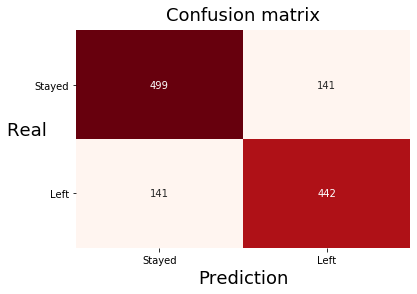

In [48]:
#Instanciando o modelo com novos parâmetros
model_otimizado=RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=32, n_estimators=1500)

#Treinando o modelo
model_otimizado.fit(x_train,y_train)

#Validando o modelo com os dados de teste
model_otimizado_pred = model_otimizado.predict(x_test)

#Verificando a acurácia do modelo
print("Accuracy: {0:.2f}%".format(100 * accuracy_score(y_test,model_otimizado_pred)),"\n")

#Verificando ROC-AUC do modelo
print("ROC-AUC: {0:.2f}".format(roc_auc_score(y_test,model_otimizado_pred)))

#Verificando relatório de classificação do modelo
print(classification_report(y_test,model_otimizado_pred))

#Plotando a matrix de confusão do modelo
cm = confusion_matrix(y_test,model_otimizado_pred)
ax = sns.heatmap(cm,annot=True,cbar=False,fmt ='d',cmap='Reds')
ax.set_title('Confusion matrix', fontsize=18,pad=10)
ax.set_xlabel('Prediction', fontsize=18)
ax.set_ylabel('Real ', fontsize=18,rotation=0)
ax.set_xticklabels(['Stayed','Left'])
ax.set_yticklabels(['Stayed','Left'], rotation=0);

##### Comparando os modelos após otimização

In [49]:
rf_modelos= np.array([['Random Forest', accuracy_score(y_test,rf_prediction).round(4), recall_score(y_test,rf_prediction).round(4),
                     precision_score(y_test,rf_prediction).round(4),f1_score(y_test,rf_prediction).round(4),roc_auc_score(y_test,rf_prediction).round(4)],
                   ['Random Forest Otimizado',accuracy_score(y_test,model_otimizado_pred).round(4), recall_score(y_test,model_otimizado_pred).round(4),
                     precision_score(y_test,model_otimizado_pred).round(4),f1_score(y_test,model_otimizado_pred).round(4),roc_auc_score(y_test,model_otimizado_pred).round(4)]])
tab_rf = pd.DataFrame(rf_modelos, columns = ["Modelo",'Acurácia',"Recall","Precisão","F1-Scores","ROC AUC"])
tab_rf.sort_values('Acurácia', inplace=True, ascending=False)
tab_rf

,Modelo,Acurácia,Recall,Precisão,F1-Scores,ROC AUC
1,Random Forest Otimizado,0.7694,0.7581,0.7581,0.7581,0.7689
0,Random Forest,0.7449,0.7153,0.7407,0.7277,0.7436


**Como esperado, o modelo aumentou todas as performances avaliadas para identificar as classes de interesse.**

### Variáveis mais importantes do modelo

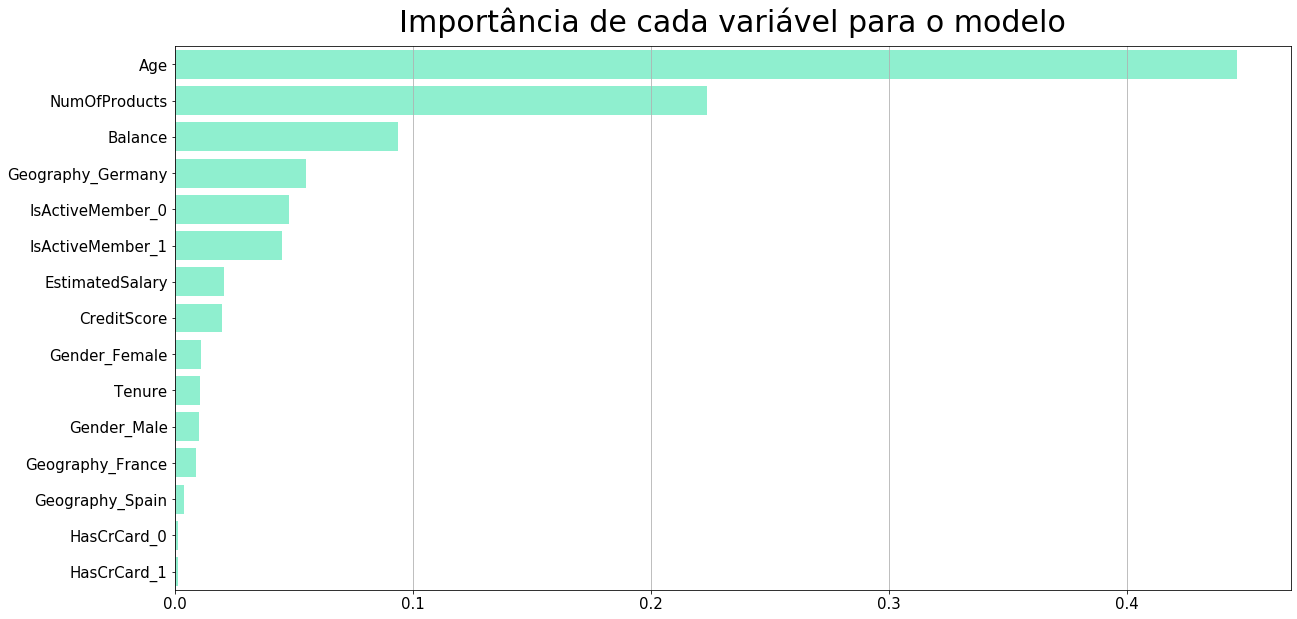

In [50]:
#Coletando as variáveis mais importantes para o modelo
importances = pd.Series(data=model_otimizado.feature_importances_, index=x_train.columns).sort_values(ascending=False)

#Plotando o gráfico das variáveis mais importantes do modelo
plt.figure(figsize=(20,10))
sns.barplot(x=importances, y=importances.index, orient='h', color='aquamarine')
plt.title("Importância de cada variável para o modelo", pad=15, fontsize=30)
plt.grid(axis="x")
plt.tick_params(labelsize=15);

Os atributos mais importantes para identificação de clientes que podem deixar a empresa foram idade, número de produtos, saldo em conta, salário estimado, escore de crédito e tempo em que é cliente da empresa. 

### Probabilidade de cada cliente sair

A partir do modelo criado é possível gerar a probabilidade de cada cliente sair da empresa. Isso, juntamente com os atributos mais importantes, pode ser uma excelente ferramenta para criar uma estratégia de manutenção de clientes.

In [51]:
#Criando coluna de probabilidade de churn no conjunto de dados
df['Prob_Churn'] = (model_otimizado.predict_proba(x[x_train.columns])[:,1] * 100).round(2)
#Ordenando os valores pela maior probabilidade de Churn
df.sort_values('Prob_Churn', inplace=True, ascending=False)
#Exibindo o conjuto de dados
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Prob_Churn
556,557,15705515,Lazarev,587,Germany,Male,40,5,138241.90,2,1,0,159418.10,0,97.06
804,805,15640280,Cameron,850,France,Male,39,4,127771.35,2,0,1,151738.54,0,97.06
7689,7690,15777452,Sauve,587,France,Female,46,6,88820.29,1,0,0,70224.34,0,97.04
1826,1827,15573893,Barry,569,Germany,Male,25,9,173459.45,2,1,1,44381.06,0,96.98
2372,2373,15578297,Ebelegbulam,737,Germany,Female,43,1,125537.38,1,1,0,138510.01,1,96.97


In [52]:
#Coletando somente os atributos de 'CustomerID' e 'Prob_Churb'
clientes = df[['CustomerId','Prob_Churn']]
#Exibindo tabela de clientes pela maior probabilidade Churn
clientes

,CustomerId,Prob_Churn
556,15705515,97.06
804,15640280,97.06
7689,15777452,97.04
1826,15573893,96.98
2372,15578297,96.97
...,...,...
4015,15631603,4.50
3797,15669887,4.23
5590,15681439,4.08
8603,15702541,4.07


<p><b>Agora cada cliente possui uma probabilidade de Churn associada as suas caractarísticas baseada no modelo de Random Forest.<b></p>

### Conclusão

<p style="text-align: justify">A partir da análise foi possível avaliar a probabilidade de saída de cada cliente da empresa a partir do conjunto de dados. Esta análise permite que a empresa possa realizar ações que visem a manutenção de seus clientes, principalmente aqueles com maior probablidade de Churn. Também, é possível destacar que as variáveis mais importantes na análise de Churn foram a idade, número de produtos, saldo em conta corrente, salário estimado, escore de crédito e tempo em que é cliente da empresa. Adicionalmente, a partir do conjunto de dados foi possível visualizar o perfil de clientes que saíram e que ficaram na empresa, o que torna esta informação de grande valia para o desenvolvimento de ações de manutenção desses clientes. Dessa maneira, essa é uma ótima forma para que as empresas possam aumentar seu faturamento, visto que a retenção de clientes é menos onerosa do que conseguir novos clientes.</p>